### Loading data binaries

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/vanderbilt/")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
from src.io.loadbinary import LoadBinary

In [4]:
filepath = "/home/vinicius/funcog/vanderbilt/vanderbilt/neural_data/pHPC_cnct.dat"

#### Plot load binary function docstring

In [5]:
perpl_LoadBinary?

Object `perpl_LoadBinary` not found.


#### Load data

In [6]:
n = 1000

In [7]:
data = LoadBinary(
    filepath,
    frequency=30000,
    nSamplesPerChannel=10000,
    channels=None,
    downsample=1,
    bitVolts=0.195,
    nChannels=64,
    precision=np.int16,
)

In [8]:
print(data)
print(data.shape)

<xarray.DataArray (times: 10000, channels: 64)>
array([[-51.675,  -1.17 ,  48.165, ...,  27.105,  25.74 ,  22.425],
       [-40.95 ,   5.265,  63.18 , ...,  53.82 ,  44.46 ,  25.155],
       [-28.86 ,  17.55 ,  82.095, ...,  47.97 ,  57.525,  27.495],
       ...,
       [ 11.895,  -7.605,  11.7  , ..., -18.135, -31.2  ,  -9.165],
       [ -5.265, -27.3  , -27.495, ..., -29.25 , -44.655, -30.225],
       [-23.205, -46.215, -47.97 , ..., -39.   , -43.485, -44.655]])
Coordinates:
  * channels  (channels) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Dimensions without coordinates: times
(10000, 64)


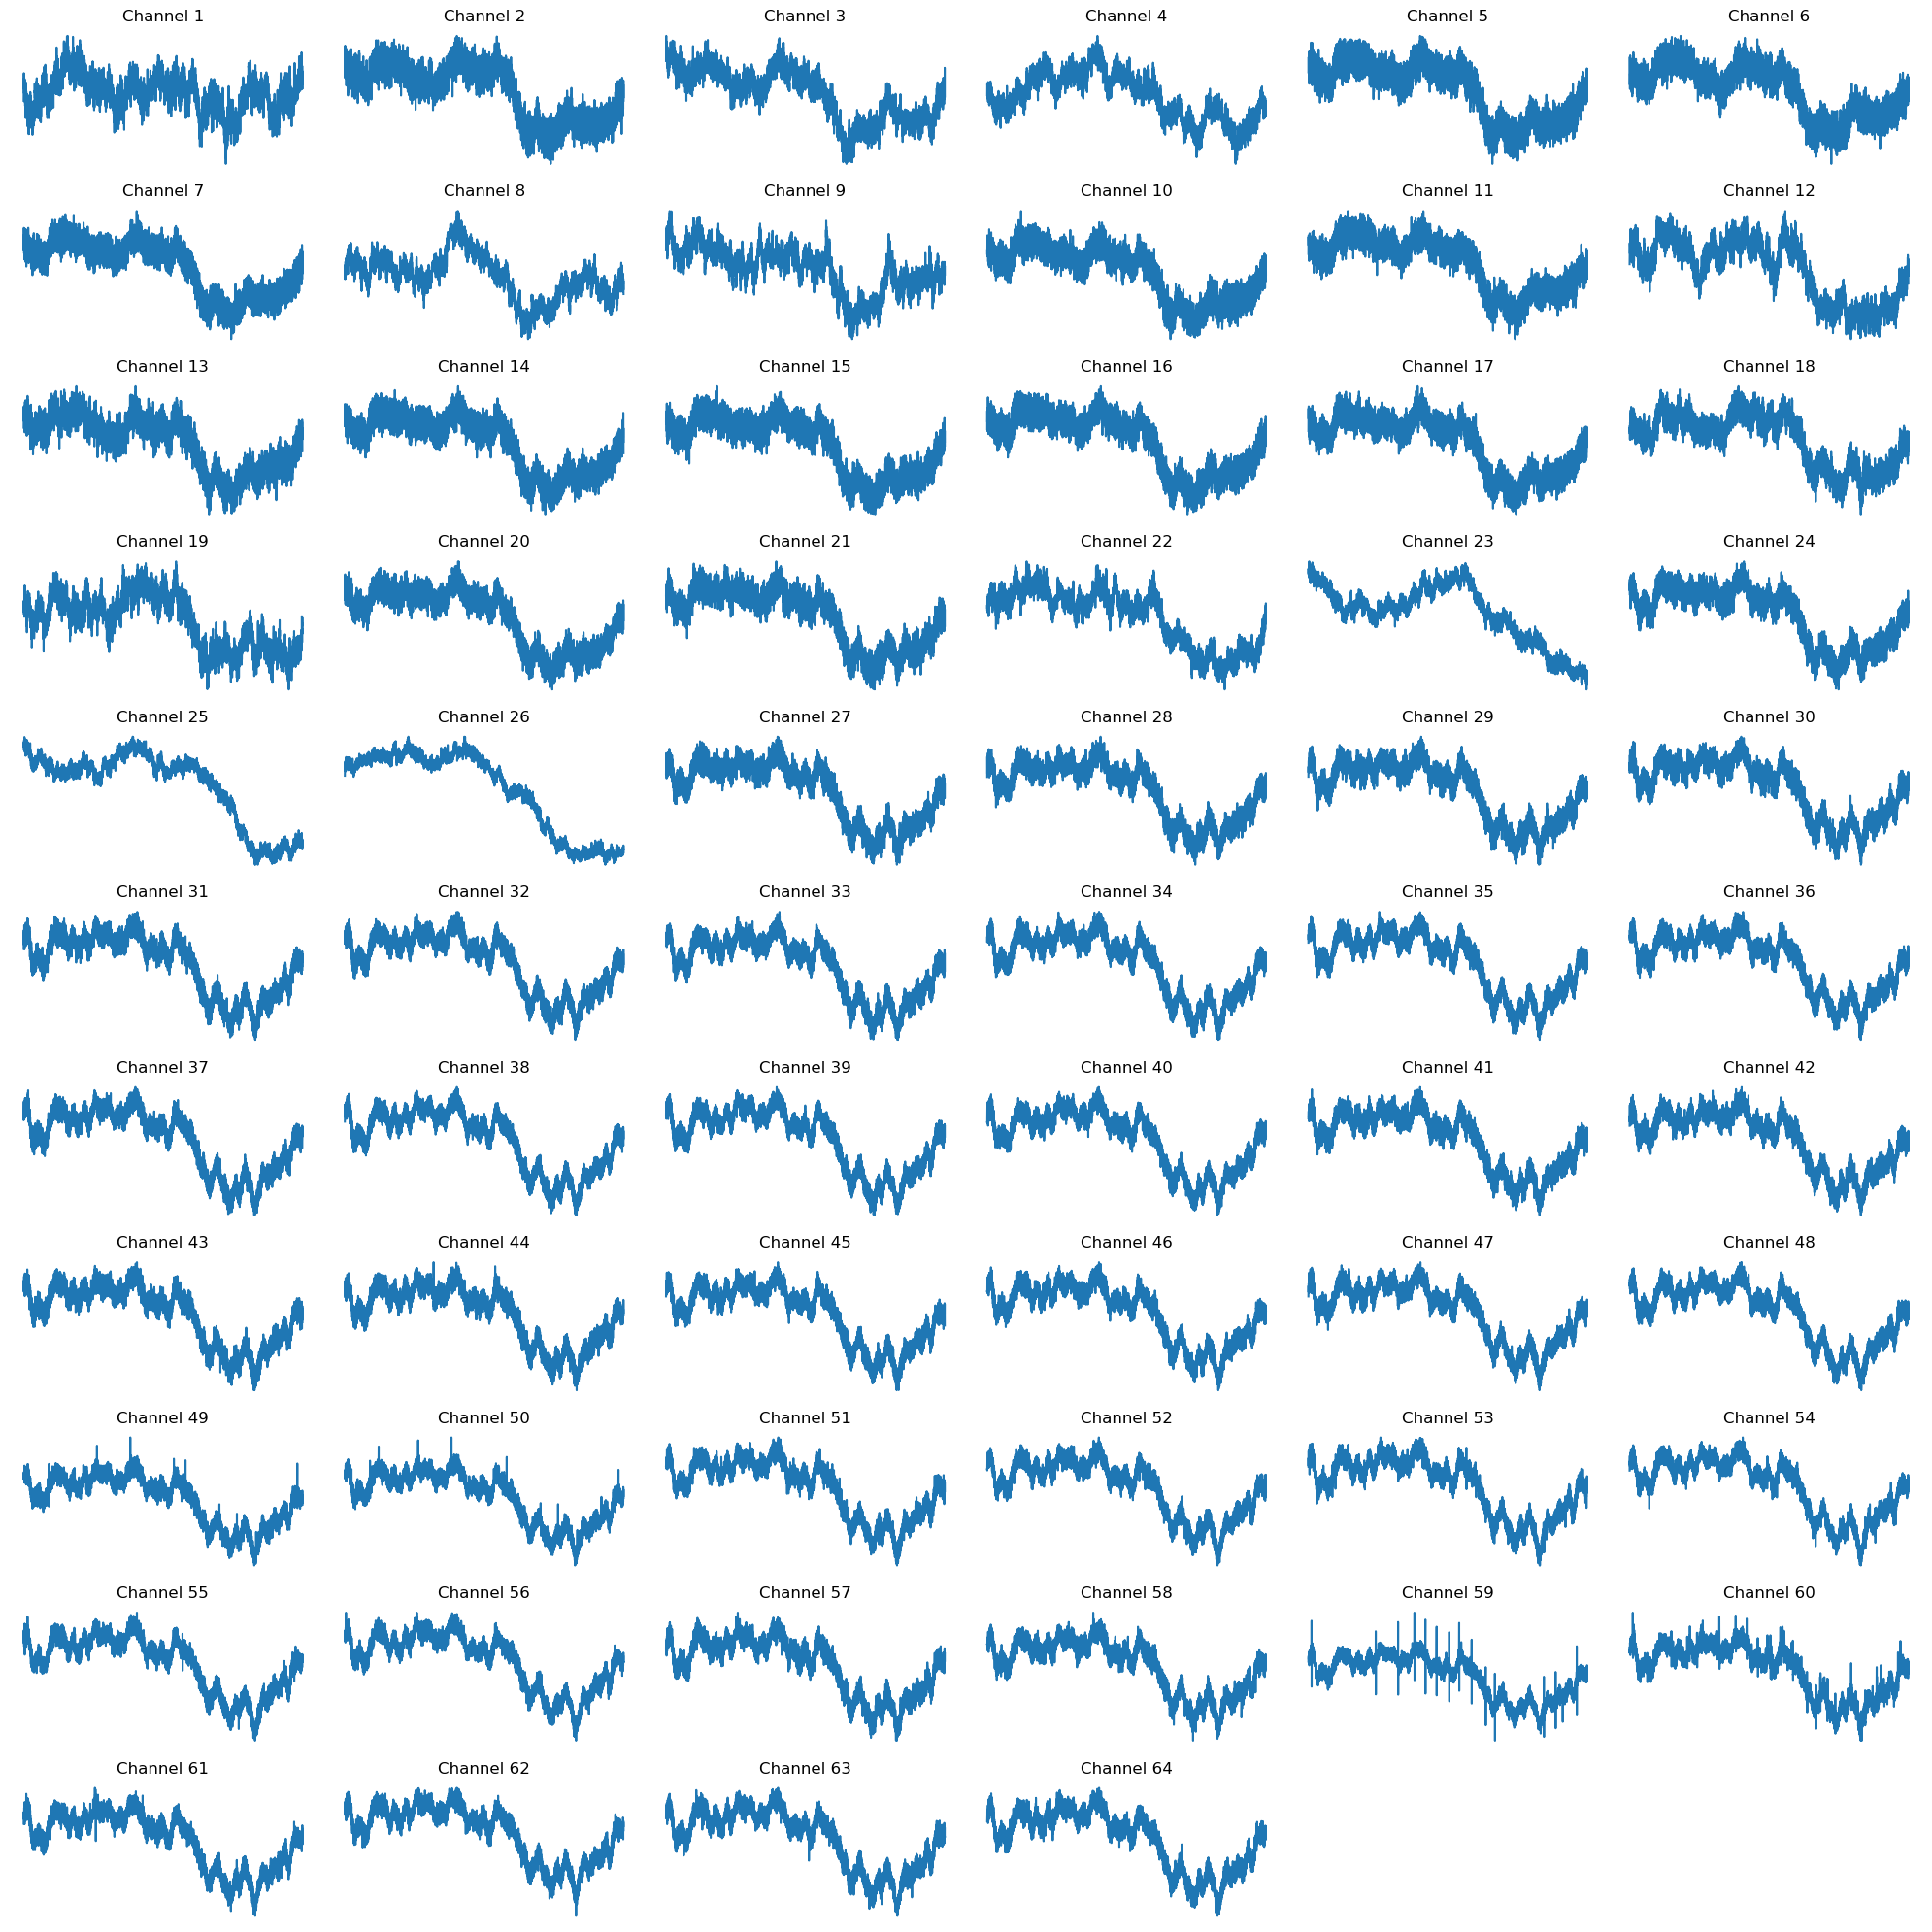

In [9]:
plt.figure(figsize=(20, 20))
for i in range(data.shape[1]):
    plt.subplot(11, 6, i + 1)
    plt.plot(data[:, i])
    plt.title(f"Channel {i + 1}")
    plt.axis("off")
plt.tight_layout()

#### Save data for different parameters to compare with Matlab version

In [10]:
downsample = [1, 10, 20]
channels = [1, 5, 10, 23, 55]

#### Different sample sizes

In [11]:
for n in tqdm([1000, 5000, 10000, 20000]):
    for decim in downsample:
        data = LoadBinary(
            filepath,
            frequency=30000,
            nSamplesPerChannel=n,
            downsample=decim,
            bitVolts=0.195,
            nChannels=64,
            channels=channels,
        )
        np.savetxt(
            f"/home/vinicius/funcog/vanderbilt/vanderbilt/test_nsamples_{n}_decim_{decim}.txt",
            data,
            delimiter=",",
        )

100%|███████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13.68it/s]


#### Different durations (in seconds)

In [12]:
for n in tqdm([1, 5, 10]):
    for decim in downsample:
        data = LoadBinary(
            filepath,
            frequency=30000,
            nSamplesPerChannel=None,
            duration=n,
            downsample=decim,
            bitVolts=0.195,
            nChannels=64,
            channels=channels,
        )
        np.savetxt(
            f"/home/vinicius/funcog/vanderbilt/vanderbilt/test_dur_{n}_decim_{decim}.txt",
            data,
            delimiter=",",
        )

100%|███████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]
